In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### Leitura e Visualização do DataFrame

In [2]:
dados_irrigacao = pd.read_csv('../dados/dados_de_irrigacao.csv')

In [3]:
dados_irrigacao.head(2)

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
0,1,100,66.666667
1,2,200,133.333333


In [4]:
dados_irrigacao.tail(2)

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
297,298,29800,19866.666667
298,299,29900,19933.333333


### EDA

### Estatística Descritiva

In [8]:
dados_irrigacao.describe()

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
count,299.000000,299.000000,299.000000
mean,150.000000,15000.000000,10000.000000
std,86.458082,8645.808233,5763.872155
min,1.000000,100.000000,66.666667
25%,75.500000,7550.000000,5033.333333
50%,150.000000,15000.000000,10000.000000
75%,224.500000,22450.000000,14966.666667
max,299.000000,29900.000000,19933.333333


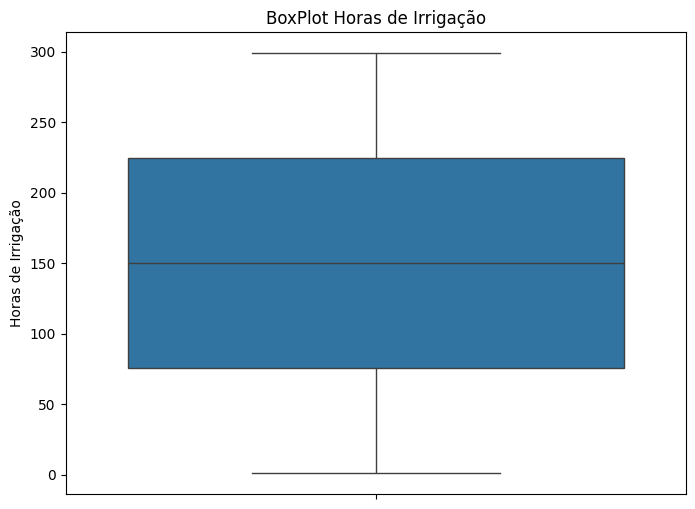

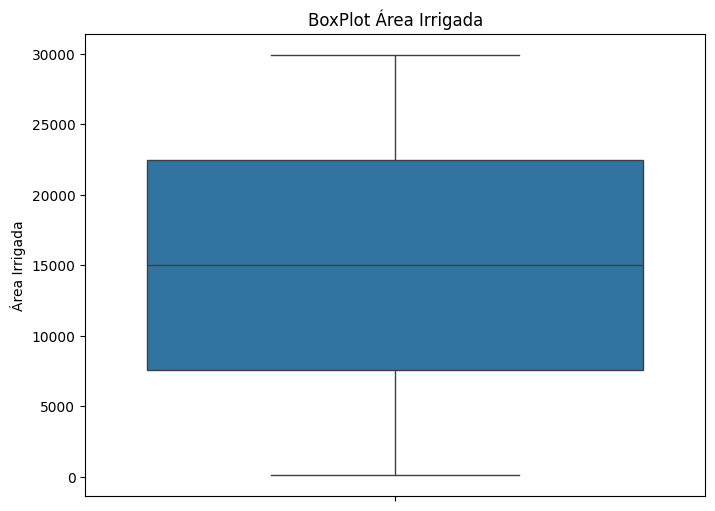

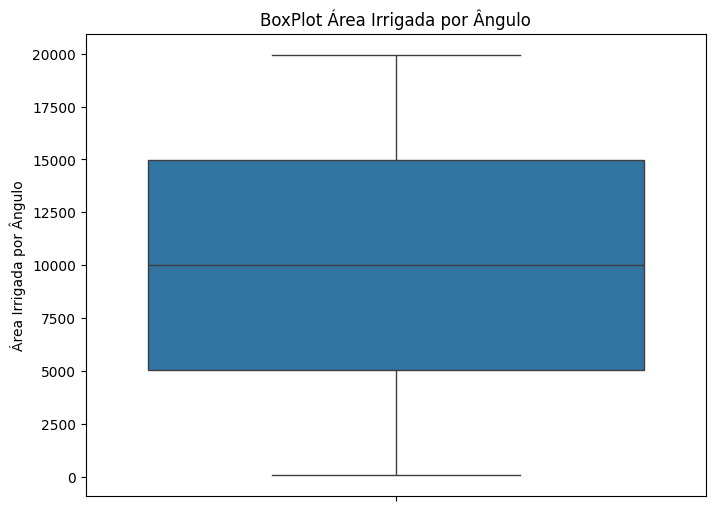

In [7]:
for col in dados_irrigacao.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=dados_irrigacao, y=col)
    plt.title(f'BoxPlot {col}')
    plt.show()


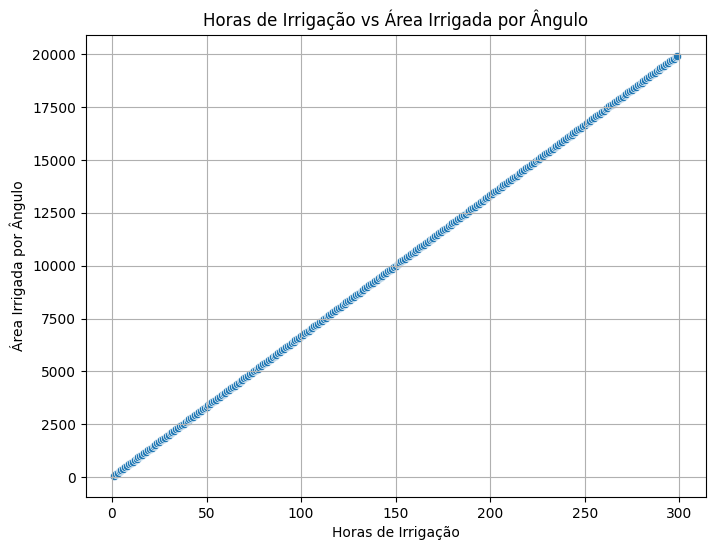

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dados_irrigacao, x='Horas de Irrigação', y='Área Irrigada por Ângulo')
plt.title('Horas de Irrigação vs Área Irrigada por Ângulo')
plt.xlabel('Horas de Irrigação')
plt.ylabel('Área Irrigada por Ângulo')
plt.grid(True)
plt.show()


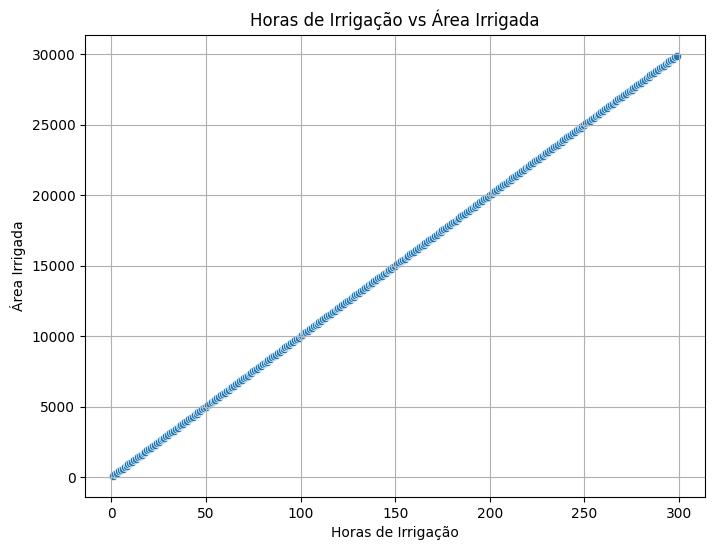

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dados_irrigacao, x='Horas de Irrigação', y='Área Irrigada')
plt.title('Horas de Irrigação vs Área Irrigada')
plt.xlabel('Horas de Irrigação')
plt.ylabel('Área Irrigada')
plt.grid(True)
plt.show()


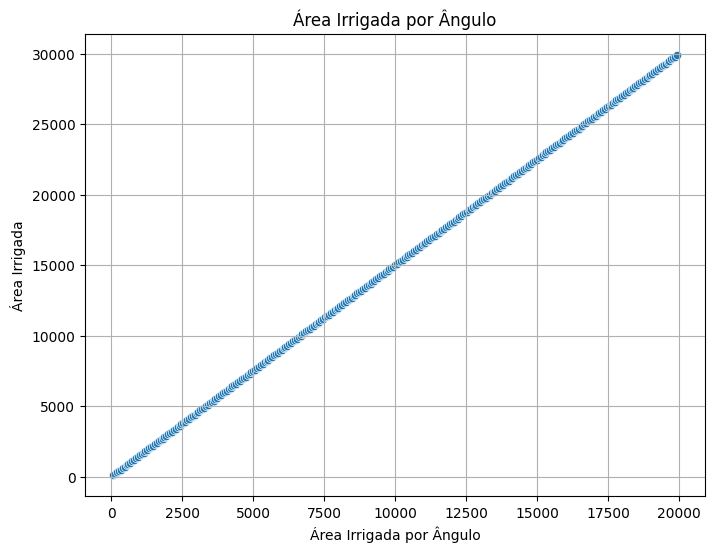

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dados_irrigacao, x='Área Irrigada por Ângulo', y='Área Irrigada')
plt.title('Área Irrigada por Ângulo')
plt.xlabel('Área Irrigada por Ângulo')
plt.ylabel('Área Irrigada')
plt.grid(True)
plt.show()


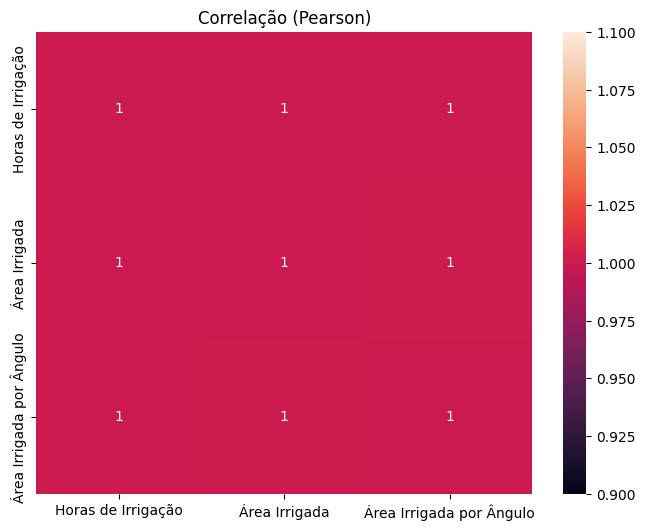

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(dados_irrigacao.corr(method='pearson'), annot=True)
plt.title('Correlação (Pearson)')
plt.show()

### Pré-Processamento

In [18]:
# Definindo as Features
X = dados_irrigacao[['Horas de Irrigação']]
# Definindo o Target
y = dados_irrigacao['Área Irrigada por Ângulo']
# Dividindo em treino, validação e teste
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, train_size=0.7, random_state=42, shuffle=False
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, shuffle=False
)

### Regressão Linear

In [19]:
reg_lin = LinearRegression()

reg_lin.fit(X_train, y_train)

LinearRegression()

### Avaliação do Modelo

#### Validação

In [21]:
pred_val = reg_lin.predict(X_val)
mae = mean_squared_error(y_val, pred_val)
mse = mean_absolute_error(y_val, pred_val)
print(f'MAE: {mae}\n MSE: {mse}')

MAE: 3.529303946892918e-23
 MSE: 5.820766091346741e-12


#### Test

In [23]:
pred_test = reg_lin.predict(X_test)
mae = mean_squared_error(y_test, pred_test)
mse = mean_absolute_error(y_test, pred_test)
print(f'MAE: {mae}\n MSE: {mse}')

MAE: 3.970466940254533e-23
 MSE: 6.063298011819522e-12


#### Val + Test

In [25]:
pred_temp = reg_lin.predict(X_temp)
mae = mean_squared_error(y_temp, pred_temp)
mse = mean_absolute_error(y_temp, pred_temp)
print(f'MAE: {mae}\n MSE: {mse}')

MAE: 3.7498854435737257e-23
 MSE: 5.942032051583131e-12


#### Visualização

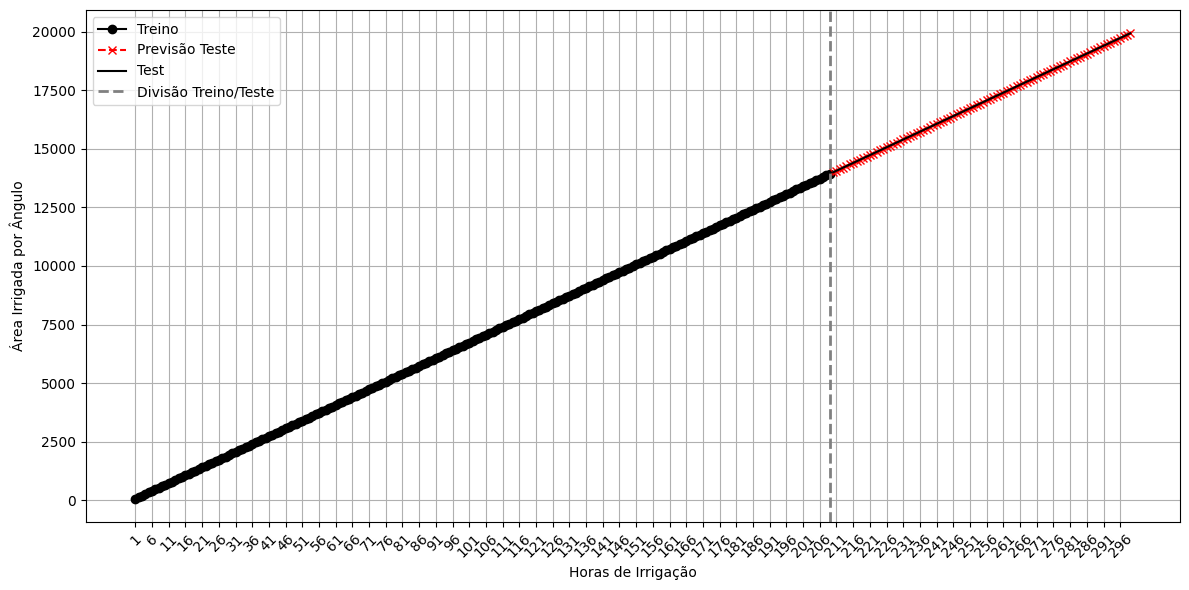

In [40]:
plt.figure(figsize=(12, 6))

plt.plot(X_train['Horas de Irrigação'], y_train, color='black', marker='o', label='Treino')

plt.plot(X_temp['Horas de Irrigação'], pred_temp, color='red', marker='x', linestyle='--', label='Previsão Teste')
plt.plot(X_temp['Horas de Irrigação'], y_temp, color='black', label='Test')
divisao = X_train['Horas de Irrigação'].iloc[-1]
plt.axvline(x=divisao, color='gray', linestyle='--', linewidth=2, label='Divisão Treino/Teste')
ticks_all = pd.concat([X_train['Horas de Irrigação'], X_temp['Horas de Irrigação']])
plt.xticks(ticks=ticks_all[::5], labels=ticks_all[::5], rotation=45)
plt.xlabel('Horas de Irrigação')
plt.ylabel('Área Irrigada por Ângulo')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

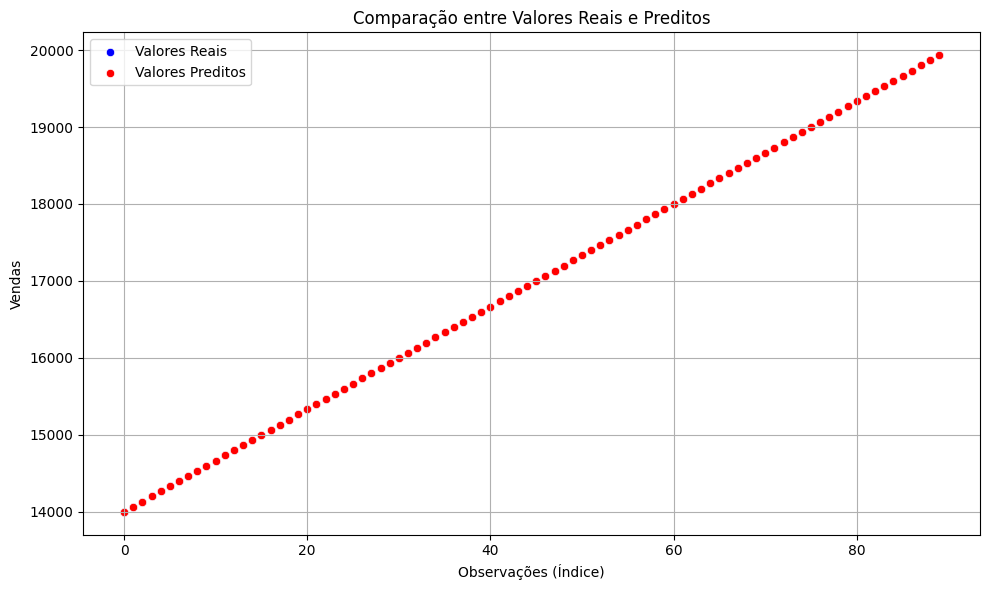

In [ ]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    x=range(X_temp['Horas de Irrigação'].shape[0]),
    y=y_temp.values,  # Correção aqui
    color='blue',
    label='Valores Reais'
)
sns.scatterplot(
    x=range(X_temp['Horas de Irrigação'].shape[0]),
    y=pred_temp.flatten(),
    color='red',
    label='Valores Preditos'
)
plt.xlabel('Observações (Índice)')
plt.ylabel('Vendas')
plt.title('Comparação entre Valores Reais e Preditos')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#### Predições de Exemplo:

In [49]:
X_ex = pd.DataFrame({'Horas de Irrigação': [42]})

pred_ex = reg_lin.predict(X_ex)
print(f'Previsao: {pred_ex}')

Previsao: [2800.]
